# Info About Dataset

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Load & Store the data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Print
df.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

In [4]:
# Shape
df.shape

(5110, 12)

In [5]:
#Empty Values
df.isna().sum()
df.dropna(inplace=True)

In [6]:
df = df.drop('id', axis=1)
df = df.drop('gender', axis=1)
df = df.drop('ever_married', axis=1)
df = df.drop('work_type', axis=1)
df = df.drop('Residence_type', axis=1)
df = df.drop('smoking_status', axis=1)


In [7]:
# Null or missing values 
df.isnull().values.any()

False

In [8]:
# Basic Statistics
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4909.000000   4909.000000    4909.000000        4909.000000   
mean     42.865374      0.091872       0.049501         105.305150   
std      22.555115      0.288875       0.216934          44.424341   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.070000   
50%      44.000000      0.000000       0.000000          91.680000   
75%      60.000000      0.000000       0.000000         113.570000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  4909.000000  
mean     28.893237     0.042575  
std       7.854067     0.201917  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000

In [9]:
# People with Disease and without
df['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

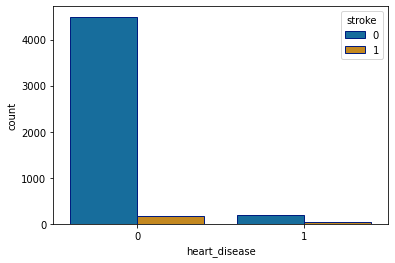

In [10]:
#Visualize the data
sns.countplot(x='heart_disease', hue='stroke', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

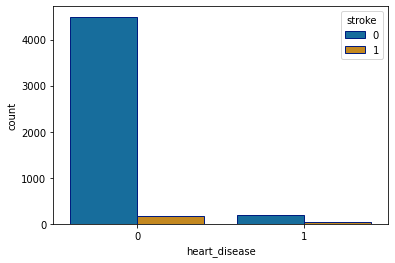

In [11]:
#Visualize the data
sns.countplot(x='heart_disease', hue='stroke', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

In [12]:
#Get Correlation
df.corr()

age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.274425       0.257123           0.235838   
hypertension       0.274425      1.000000       0.115991           0.180543   
heart_disease      0.257123      0.115991       1.000000           0.154525   
avg_glucose_level  0.235838      0.180543       0.154525           1.000000   
bmi                0.333398      0.167811       0.041357           0.175502   
stroke             0.232331      0.142515       0.137938           0.138936   

                        bmi    stroke  
age                0.333398  0.232331  
hypertension       0.167811  0.142515  
heart_disease      0.041357  0.137938  
avg_glucose_level  0.175502  0.138936  
bmi                1.000000  0.042374  
stroke             0.042374  1.000000

In [13]:
# Split into Feature data & target data
X = df[["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]]
Y = df['stroke']

In [14]:
# Split again - 80% Training & 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [47]:
# # Feature Scaling - Scale the values to be between 0 & 1 inclusive
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [15]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 1)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

In [16]:
# Accuracy on training data set
model = forest
model.score(X_train, Y_train)

1.0

In [17]:
# Accuracy on test data set
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

# Confusion Matrix
print(cm)

# Model Accuracy
acc = (TP+TN)/(TP+TN+FN+FP)
print("Accuracy:", acc)

[[929   2]
 [ 51   0]]
Accuracy: 0.9460285132382892


In [18]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
type(X_test)

pandas.core.frame.DataFrame

In [22]:
X_test

age  hypertension  heart_disease  avg_glucose_level   bmi
2648  52.0             0              0              87.26  40.1
3441  59.0             0              0              90.06  28.9
4935  16.0             0              0              97.23  30.6
1316  21.0             0              0             134.45  29.1
3271  36.0             0              0              74.63  31.6
...    ...           ...            ...                ...   ...
4674   8.0             0              0              61.07  19.1
4351  39.0             0              0              87.39  57.9
3419  72.0             0              0             118.22  21.9
3047  22.0             0              0              62.52  38.2
3021  79.0             0              0             103.21  22.9

[982 rows x 5 columns]

# Example

In [23]:
testdata = [[52.0,0,0,87.26,40.1]]
nptest = np.array(testdata)

In [24]:
x = model.predict(nptest)

In [25]:
print(x)
model.predict(X_test)

[0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Export Model

In [27]:
import pickle
# Save the Modle to file in the current working directory

Pkl_Filename = "stroke_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

# Import & Test Model

In [28]:
import pickle

Pkl_Filename = "stroke_Model.pkl"

with open(Pkl_Filename, 'rb') as file:  
    Pickled_stroke_Model = pickle.load(file)

In [29]:
# Sample Data
testdata = [[52.0,0,0,87.26,40.1]]
#Conversion
nptest = np.array(testdata)
#Prediction
x = Pickled_stroke_Model.predict(nptest)
print(x)

[0]


In [30]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)